## Comparison of Hi-C experiments

__running time__: < 5 min

### Comparison between cell types

The `tadbit merge` tool is used to combine two working environments together. It is usually intended for the merging of biological replicas in order to increase the resolution of the Hi-C matrices.
Optionally, the tool provides relevant measures to compare the experiments to be merged at a given resolution.

We are going to use `tadbit merge` with the `--skip_merge` flag to compare the experiments:

In [1]:
%%bash

tadbit merge -w ../results/compare_PSC_B \
    -w1 ../results/PSC_rep1/ \
    -w2 ../results/B_rep1/ \
    --skip_merge \
    -r 100000 \
    --norm

../results/PSC_rep1/trace.db
../results/B_rep1/trace.db
  - loading first sample ../results/PSC_rep1/03_filtered_reads/intersection_f69652928b.bam[2021-10-06 13:56:18]

  (Matrix size 1598x1598)                                                      [2021-10-06 13:56:18]

  - Parsing BAM (100 chunks)                                                   [2021-10-06 13:56:19]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2021-10-06 13:56:21]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - loading second sample ../results/B_rep1/03_filtered_reads/intersection_f69652928b.bam[2021-10-06 13:56:26]

  (Matrix size 1598x1598)                                                      [2021-10-06 13:56:26]

  - Parsing BAM (100 chunks

Results are stored in the newly created folder `compare_PSC_B/00_merge/`. They include the spearman rank correlation of the matrix diagonals at increasing genomic distances and the correlation of the eigenvectors of the matrices.

In [1]:
%%bash

ls ../results/compare_PSC_B/00_merge/

decay_corr_dat_100000_65e8a7b651.png
decay_corr_dat_100000_65e8a7b651.txt
eigen_corr_dat_100000_65e8a7b651.png
eigen_corr_dat_100000_65e8a7b651.txt


#### The Spearman rank correlation of the matrix diagonals

Spearman rank correlation of the matrix diagonals at increasing genomic distances

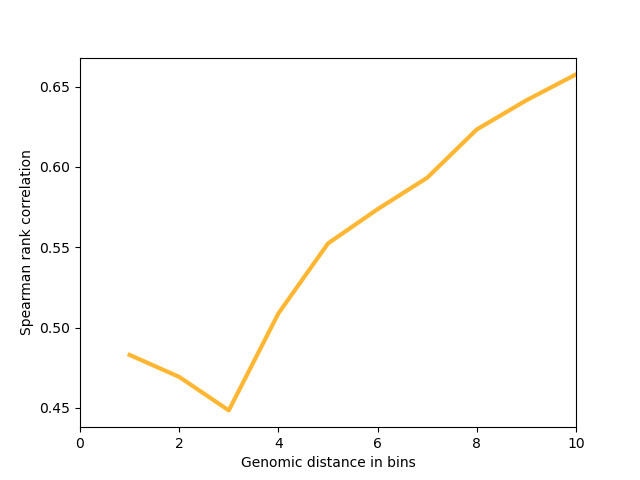

In [3]:
from IPython.display import Image
Image(filename='../results/compare_PSC_B/00_merge/decay_corr_dat_100000_65e8a7b651.png')

#### The correlation of the eigenvectors

Since the eigenvectors of a matrix capture its internal correlations, two matrices with highly correlation of eigenvectors are considered to have similar structure.

In this case we limit the computation to the first 6 eigenvectors

Eigenvector correlation

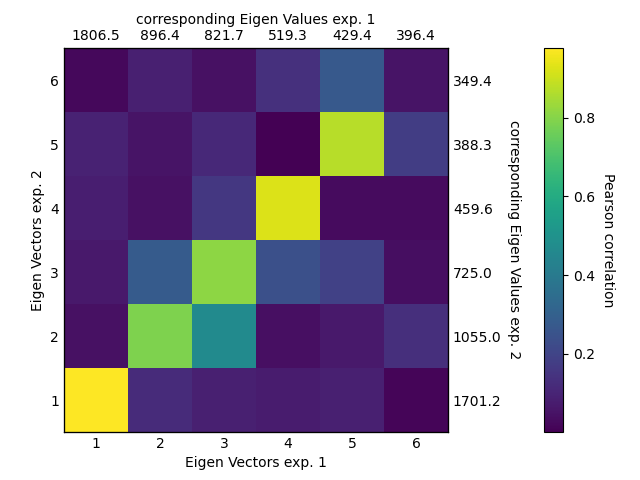

In [4]:
Image(filename='../results/compare_PSC_B/00_merge/eigen_corr_dat_100000_65e8a7b651.png')

__The stratum-adjusted correlation coefficient (SCC) score__


The SCC score as in HiCrep (see https://doi.org/10.1101/gr.220640.117) is also computed. The value of SCC ranges from −1 to 1 and can be interpreted in a way similar to the standard correlation.  

- correlation score (SCC): 0.5571 (+- 0.0111381)

__The reproducibility score (Q)__

Computed as in HiC-spector (https://doi.org/10.1093/bioinformatics/btx152), it is also based on comparing eigenvectors. The reproducibility score ranges from 0 (low similarity) to 1 (identity).

- reproducibility score: 0.2153

### Questions

- Looking at the correlation of eigenvectors, would you conclude that the genome structure of chromosome 3 is the same in B and PSC cells?
- Looking at the obtained plot of the spearman rank correlation of the matrix diagonals, would you conclude that the genome structure of chromosome 3 is the same in B and PSC cells?
- In general, would you expect the plot of the spearman rank correlation of the matrix diagonals increase or decrease and why?